# SVM MODEL IMPLEMENTATION

## **1. Based on reference 1 - SVM MODEL ON Twitter Data Analysis:**


In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
#Importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re,nltk
import string
import warnings
import sklearn
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings('ignore')

## **2. Loading Data:**


In [ ]:
#Loading the data
twitter_data = pd.read_csv('/content/twitter_training.csv')

In [ ]:
twitter_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## **3. Preprocess Data:**

In [ ]:
twitter_data = twitter_data.drop(columns=['2401','Borderlands'])
twitter_data.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
twitter_data = twitter_data.rename(columns={'Positive':'label','im getting on borderlands and i will murder you all ,': 'text'})
twitter_data.head()

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
twitter_data = twitter_data[twitter_data['label'].isin(['Positive', 'Negative', 'Neutral'])]
twitter_data.head()

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
twitter_data = twitter_data.dropna()
twitter_data.isnull().sum()

,0
label,0
text,0


In [ ]:
twitter_data = twitter_data.drop_duplicates()

In [ ]:
twitter_data['text'] = twitter_data['text'].str.replace("[^a-zA-Z#]", " ")
twitter_data.head()

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [ ]:
twitter_data['text'] = twitter_data['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
twitter_data.head()

,label,text
0,Positive,"coming borders will kill all,"
1,Positive,"getting borderlands will kill all,"
2,Positive,"coming borderlands will murder all,"
3,Positive,"getting borderlands will murder all,"
4,Positive,"getting into borderlands murder all,"


In [ ]:
twitter_data0 = twitter_data.copy()
twitter_data0.to_csv('twitter_data_backup.csv', index=False)

In [ ]:
twitter_data['text'] = twitter_data['text'].apply(lambda x: x.split())
twitter_data.head()

,label,text
0,Positive,"[coming, borders, will, kill, all,]"
1,Positive,"[getting, borderlands, will, kill, all,]"
2,Positive,"[coming, borderlands, will, murder, all,]"
3,Positive,"[getting, borderlands, will, murder, all,]"
4,Positive,"[getting, into, borderlands, murder, all,]"


In [ ]:
twitter_data.shape

(57484, 2)

In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57484 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   57484 non-null  object
 1   text    57484 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


## **4. Exploratory Data Analysis:**

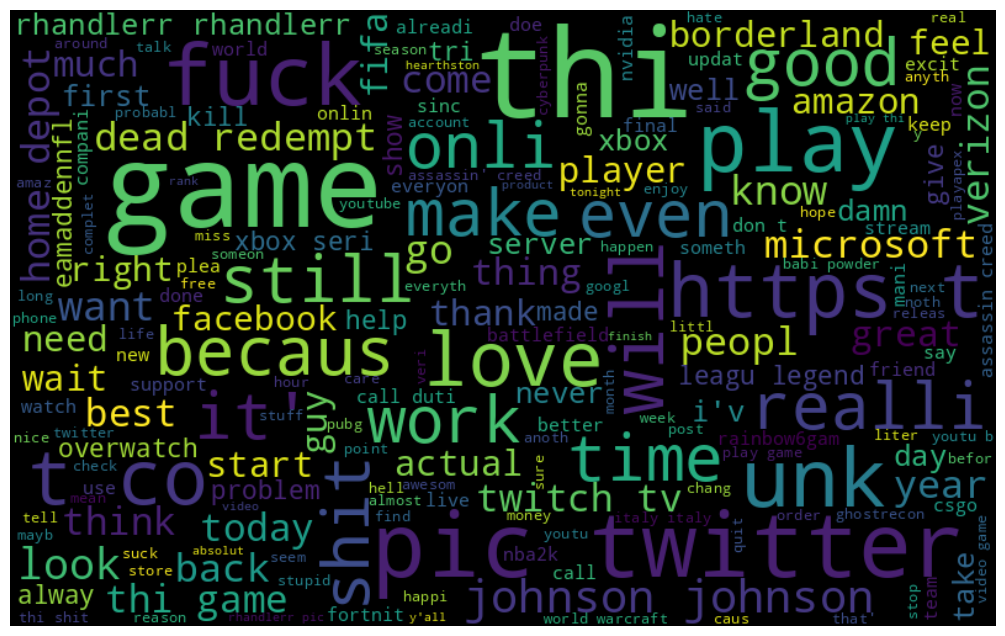

In [ ]:
all_words = " ".join([" ".join(sentence) for sentence in twitter_data['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

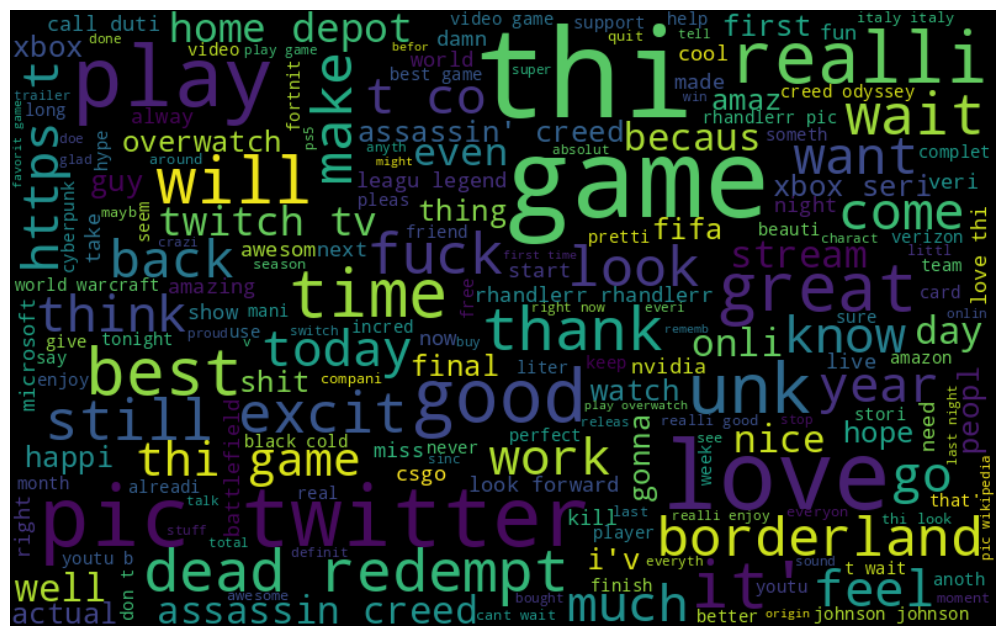

In [ ]:
all_words = " ".join([" ".join(sentence) for sentence in twitter_data['text'][twitter_data['label']=='Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

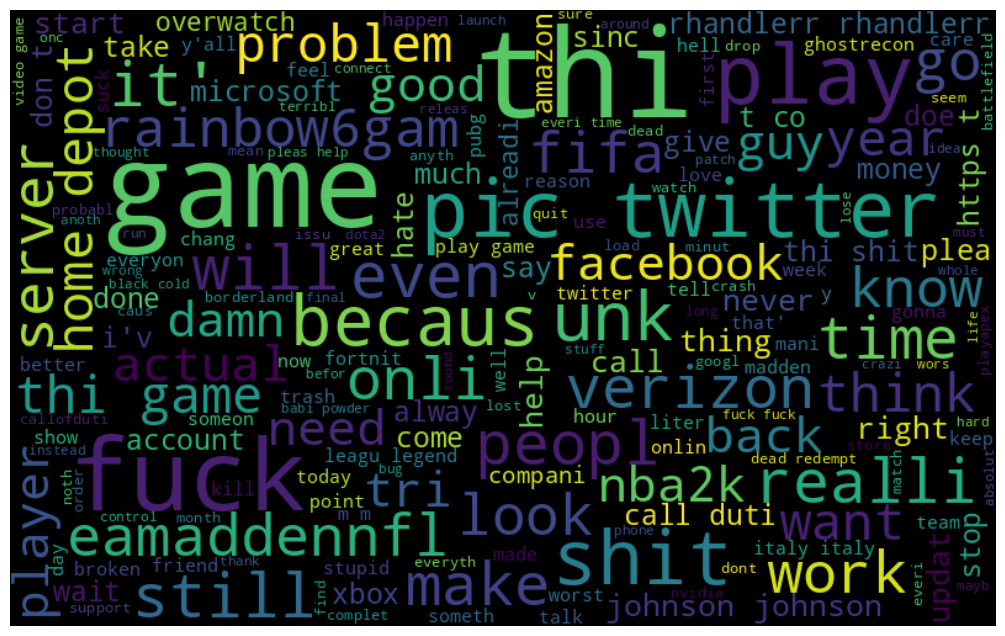

In [ ]:
all_words = " ".join([" ".join(sentence) for sentence in twitter_data['text'][twitter_data['label']=='Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

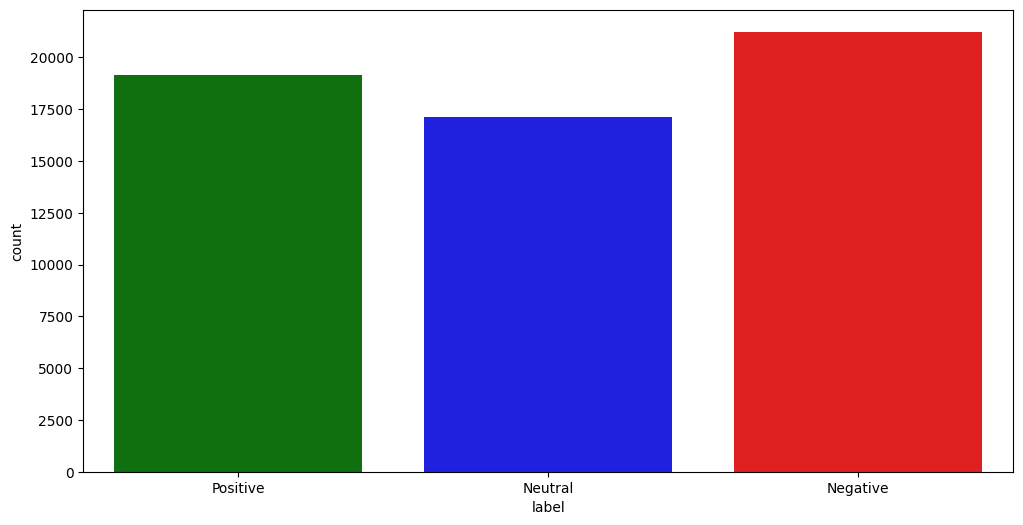

In [ ]:
custom_palette = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'blue'
}

plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=twitter_data, palette=custom_palette)
plt.show()

In [ ]:
sentiment_counts = twitter_data['label'].value_counts().reset_index()
sentiment_counts.columns = ['label', 'count']

fig = go.Figure(go.Funnelarea(
    text=sentiment_counts['label'],
    values=sentiment_counts['count'],
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
fig.show()

## **5. Splitting Data to Train-70%, Test-15%, Validation-15%:**

In [ ]:
train_valid_df, test_df = train_test_split(twitter_data, test_size=0.15, random_state=42)

train_data, val_df = train_test_split(train_valid_df, test_size=0.1765, random_state=42)

print(f"Training Set: {len(train_data)} samples")
print(f"Validation Set: {len(val_df)} samples")
print(f"Testing Set: {len(test_df)} samples")

Training Set: 40237 samples
Validation Set: 8624 samples
Testing Set: 8623 samples


## **6. Stemmimg,Vectorisation, Label Mapping:**

In [ ]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix

In [ ]:
stemmer = PorterStemmer()

def preprocess_text(twitter_data):
    twitter_data['text'] = twitter_data['text'].astype(str)
    twitter_data['text'] = twitter_data['text'].apply(lambda sentence: " ".join([stemmer.stem(word) for word in sentence.split()]))
    return twitter_data

train_df = preprocess_text(train_data)
test_df = preprocess_text(test_df)
val_df = preprocess_text(val_df)
print(train_df.head())

          label                                               text
58961  Negative  ['even', 'proud', 'part', 'learn', 'more,', 'v...
25540  Negative  ['@dot_india', '@rsprasad', '@goi_meiti', 'wor...
35347   Neutral  ['microsoft', 'shut', 'down', 'controversi', '...
72396  Positive  ['thi', 'awesome!', 'congratul', 'entir', 'fol...
11628  Positive                                ['beauti', 'clean']


In [ ]:
# Convert text to numerical features (Bag-of-Words)
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
X_val = vectorizer.transform(val_df['text'])

In [ ]:
label_mapping = {"Neutral": 0, "Positive": 1, "Negative": 2}
y_train = train_df['label'].map(label_mapping)
y_test = test_df['label'].map(label_mapping)
y_val = val_df['label'].map(label_mapping)

## **7. SVM Classifier:**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

In [ ]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

Training Data Metrics:
Accuracy: 0.8764818450679722
Precision: 0.8808916491221706
Recall: 0.8764818450679722
F1-score: 0.8762237084814544
              precision    recall  f1-score   support

     Neutral       0.94      0.81      0.87     11983
    Positive       0.87      0.87      0.87     13350
    Negative       0.84      0.93      0.88     14904

    accuracy                           0.88     40237
   macro avg       0.88      0.87      0.88     40237
weighted avg       0.88      0.88      0.88     40237



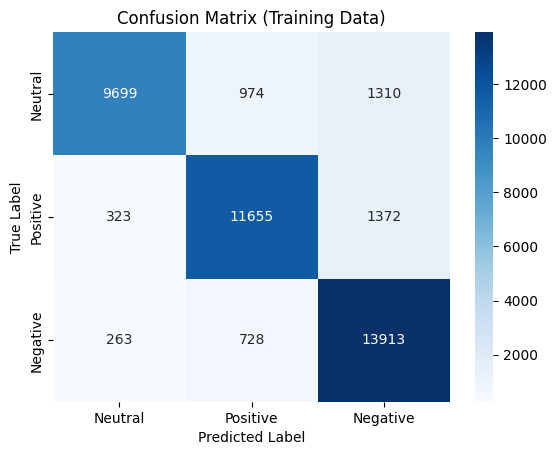

In [ ]:
y_train_pred = model.predict(X_train)
print("Training Data Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1-score:", f1_score(y_train, y_train_pred, average='weighted'))
print(classification_report(y_train, y_train_pred, target_names=label_mapping.keys()))

cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Data)')
plt.show()


Validation Data Metrics:
Accuracy: 0.8274582560296846
Precision: 0.8322778073909701
Recall: 0.8274582560296846
F1-score: 0.8266404715606557
              precision    recall  f1-score   support

     Neutral       0.89      0.74      0.81      2561
    Positive       0.83      0.82      0.82      2841
    Negative       0.79      0.90      0.84      3222

    accuracy                           0.83      8624
   macro avg       0.84      0.82      0.83      8624
weighted avg       0.83      0.83      0.83      8624



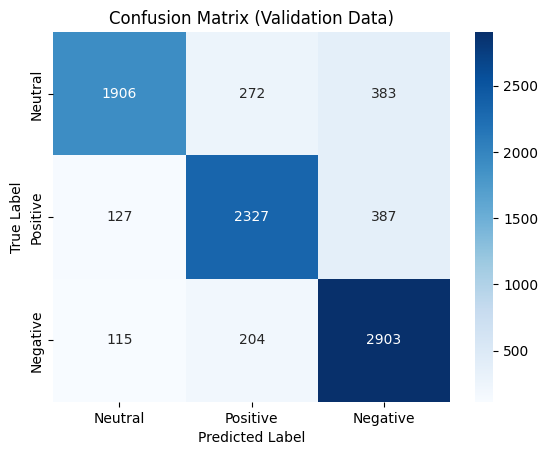

In [ ]:
y_val_pred = model.predict(X_val)
print("\nValidation Data Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_val_pred, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_pred, average='weighted'))
print(classification_report(y_val, y_val_pred, target_names=label_mapping.keys()))

cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Validation Data)')
plt.show()


Testing Data Metrics:
Accuracy: 0.8204801113301635
Precision: 0.82665918569681
Recall: 0.8204801113301635
F1-score: 0.819525694980571
              precision    recall  f1-score   support

     Neutral       0.89      0.73      0.80      2566
    Positive       0.83      0.81      0.82      2946
    Negative       0.78      0.90      0.83      3111

    accuracy                           0.82      8623
   macro avg       0.83      0.82      0.82      8623
weighted avg       0.83      0.82      0.82      8623



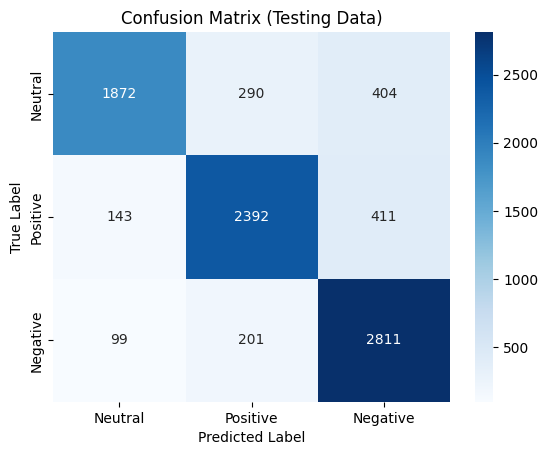

In [ ]:
y_test_pred = model.predict(X_test)
print("\nTesting Data Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_test_pred, average='weighted'))
print(classification_report(y_test, y_test_pred, target_names=label_mapping.keys()))

cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

# 2. RNN-BILSTM MODEL


In [ ]:
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens_stemmed = [ps.stem(word) for word in tokens]
    tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stemmed]
    return ' '.join(tokens_lemmatized)

twitter_data0['text'] = twitter_data0['text'].apply(preprocess_text)
print(twitter_data0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


          label                                               text
0      Positive                                   come border kill
1      Positive                                get borderland kill
2      Positive                             come borderland murder
3      Positive                              get borderland murder
4      Positive                              get borderland murder
...         ...                                                ...
74676  Positive  realiz window partit like year behind nvidia d...
74677  Positive  realiz window partit year behind nvidia driver...
74678  Positive  realiz window partit year behind nvidia driver...
74679  Positive  realiz window partit like year behind nvidia d...
74680  Positive  like window partit like year behind driver ide...

[57484 rows x 2 columns]


In [ ]:
train_valid_df, test_df = train_test_split(twitter_data0, test_size=0.15, random_state=42)

train_df, val_df = train_test_split(train_valid_df, test_size=0.1765, random_state=42)

print(f"Training Set: {len(train_df)} samples")
print(f"Validation Set: {len(val_df)} samples")
print(f"Testing Set: {len(test_df)} samples")

Training Set: 40237 samples
Validation Set: 8624 samples
Testing Set: 8623 samples


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

tokenizer = Tokenizer()
tokenizer.fit_on_texts(twitter_data0['text'])

X_train = tokenizer.texts_to_sequences(train_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])
X_val = tokenizer.texts_to_sequences(val_df['text'])

max_length = 50
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')
X_val = pad_sequences(X_val, maxlen=max_length, padding='post', truncating='post')

label_encoder = LabelEncoder()
all_labels = pd.concat([train_df['label'], test_df['label'], val_df['label']])
label_encoder.fit(all_labels.unique())

y_train = label_encoder.transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])
y_val = label_encoder.transform(val_df['label'])

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=256,
                        input_length=max_length))
lstm_model.add(Bidirectional(LSTM(128, return_sequences=False)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32,
                                     validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6274 - loss: 0.8025 - val_accuracy: 0.8227 - val_loss: 0.4572
Epoch 2/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8912 - loss: 0.2923 - val_accuracy: 0.8708 - val_loss: 0.3444
Epoch 3/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9345 - loss: 0.1719 - val_accuracy: 0.8849 - val_loss: 0.3347
Epoch 4/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9539 - loss: 0.1186 - val_accuracy: 0.8872 - val_loss: 0.3753
Epoch 5/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9627 - loss: 0.0931 - val_accuracy: 0.8897 - val_loss: 0.4020
Epoch 6/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9678 - loss: 0.0801 - val_accuracy: 0.8885 - val_loss: 0.4360
Epoch 7/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9711 - loss: 0.0689 - val_accuracy: 0.8900 - val_loss: 0.4602
Epoch 8/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9747 -

In [ ]:
loss, accuracy = lstm_model.evaluate(X_train, y_train)
print(f'Train Accuracy: {accuracy * 100:.2f}%')
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
loss, accuracy = lstm_model.evaluate(X_val, y_val)
print(f'Val Accuracy: {accuracy * 100:.2f}%')

1258/1258 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9608 - loss: 0.1074
Train Accuracy: 95.98%
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8808 - loss: 0.3477
Test Accuracy: 88.02%
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8811 - loss: 0.3448
Val Accuracy: 88.49%


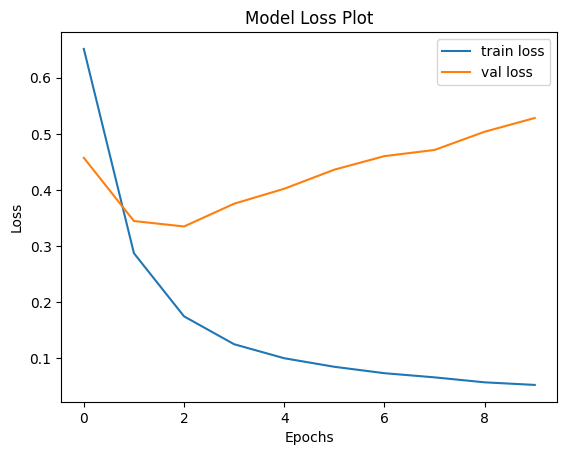

In [ ]:
plt.plot(lstm_model_history.history['loss'], label='train loss')
plt.plot(lstm_model_history.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Plot")
plt.legend()
plt.show()

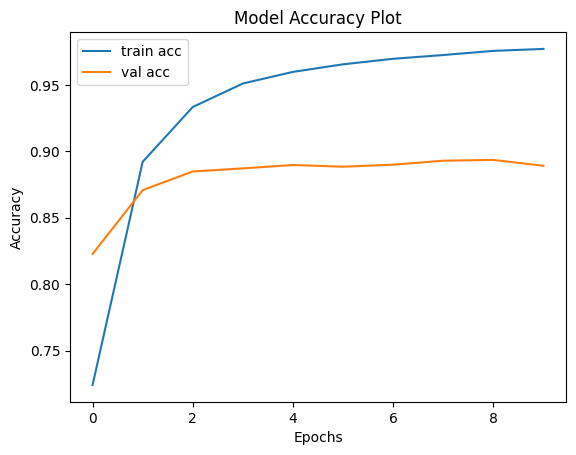

In [ ]:
plt.plot(lstm_model_history.history['accuracy'], label='train acc')
plt.plot(lstm_model_history.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Plot")
plt.legend()
plt.show()

# 3. Distil BERT -BILSTM Model

In [ ]:
!pip install hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 MB 16.0 MB/s eta 0:00:00


In [ ]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [ ]:
import torch, numpy, transformers
print("Torch:", torch.__version__)
print("Transformers:", transformers.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("NumPy:", numpy.__version__)
print("dtypes attribute:", hasattr(numpy, "dtypes"))

Torch: 2.6.0+cu124
Transformers: 4.51.3
CUDA Available: True
NumPy: 2.0.2
dtypes attribute: True


In [ ]:
import torch, numpy as np
from transformers import DistilBertTokenizer, DistilBertModel, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd, re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
embedding_dim = 256
lstm_hidden_size = 128
batch_size = 32
learning_rate = 2e-5
num_epochs = 10
dropout_rate = 0.4

In [ ]:
twitter_data1 = pd.read_csv("/content/df0_backup.csv")
twitter_data1['text'] = twitter_data1['text'].astype(str)
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(text):
    text = re.sub(r"http\S+|www\S+|@\w+|[^a-zA-Z\s]", '', text)
    text = text.lower().strip()
    return " ".join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words])

twitter_data1['text'] = twitter_data1['text'].apply(preprocess)
le = LabelEncoder()
twitter_data1['label'] = le.fit_transform(twitter_data1['label'].astype(str))

In [ ]:
train_val_texts, test_texts, train_val_labels, test_labels = train_test_split(
    twitter_data1['text'], twitter_data1['label'], test_size=0.15, stratify=df1 ['label'], random_state=42)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_val_texts, train_val_labels, test_size=0.1765, stratify=train_val_labels, random_state=42)

print("Train Set Size:", len(train_texts))
print("Validation Set Size:", len(val_texts))
print("Test Set Size:", len(test_texts))

Train Set Size: 40237
Validation Set Size: 8624
Test Set Size: 8623


In [ ]:
# Tokenization - Using model from HUgging face
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
class TwitterDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=64, return_tensors="pt")
        self.labels = torch.tensor(labels.astype(int).values, dtype=torch.long)

    def __getitem__(self, idx):
        item = {k: v[idx] for k, v in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = TwitterDataset(train_texts, train_labels)
val_dataset = TwitterDataset(val_texts, val_labels)
test_dataset = TwitterDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
class DistilBERT_BiLSTM(torch.nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.lstm = torch.nn.LSTM(input_size=768, hidden_size=lstm_hidden_size,
                                  bidirectional=True, batch_first=True)
        self.dropout = torch.nn.Dropout(dropout_rate)
        self.fc = torch.nn.Linear(2 * lstm_hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        lstm_out, _ = self.lstm(out.last_hidden_state)
        pooled = torch.mean(lstm_out, dim=1)
        return self.fc(self.dropout(pooled))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBERT_BiLSTM(num_classes=3).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_labels),
                                     y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
num_training_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0,
                                            num_training_steps=num_training_steps)

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = total_train_correct = 0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        preds = torch.argmax(outputs, dim=1)
        total_train_loss += loss.item()
        total_train_correct += (preds == labels).sum().item()

    train_acc = total_train_correct / len(train_dataset)
    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append(train_acc)


    model.eval()
    val_loss = val_correct = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask)
            loss = loss_fn(outputs, labels)

            preds = torch.argmax(outputs, dim=1)
            val_loss += loss.item()
            val_correct += (preds == labels).sum().item()

    val_acc = val_correct / len(val_dataset)
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {total_train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")


Epoch 1/10 | Train Loss: 940.9850, Acc: 0.6880 | Val Loss: 160.6789, Acc: 0.7672
Epoch 2/10 | Train Loss: 540.1080, Acc: 0.8407 | Val Loss: 114.1888, Acc: 0.8425
Epoch 3/10 | Train Loss: 276.6465, Acc: 0.9216 | Val Loss: 96.4170, Acc: 0.8813
Epoch 4/10 | Train Loss: 167.5036, Acc: 0.9522 | Val Loss: 87.9940, Acc: 0.8941
Epoch 5/10 | Train Loss: 118.6758, Acc: 0.9651 | Val Loss: 91.3623, Acc: 0.8949
Epoch 6/10 | Train Loss: 90.6957, Acc: 0.9728 | Val Loss: 89.8610, Acc: 0.9020
Epoch 7/10 | Train Loss: 73.2471, Acc: 0.9767 | Val Loss: 93.0844, Acc: 0.9062
Epoch 8/10 | Train Loss: 62.6732, Acc: 0.9796 | Val Loss: 94.4142, Acc: 0.9080
Epoch 9/10 | Train Loss: 58.0600, Acc: 0.9806 | Val Loss: 92.8107, Acc: 0.9106
Epoch 10/10 | Train Loss: 51.6528, Acc: 0.9820 | Val Loss: 93.6097, Acc: 0.9109


Test Loss: 100.1692 | Test Accuracy: 0.9093
              precision    recall  f1-score   support

    Negative       0.92      0.91      0.92      3186
     Neutral       0.91      0.91      0.91      2566
    Positive       0.90      0.91      0.90      2871

    accuracy                           0.91      8623
   macro avg       0.91      0.91      0.91      8623
weighted avg       0.91      0.91      0.91      8623



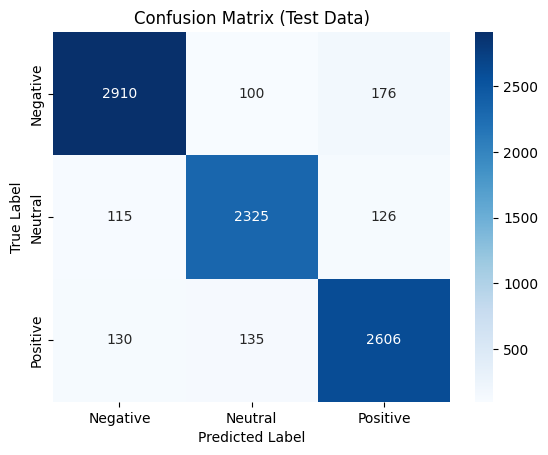

In [ ]:
test_losses = []
test_accuracies = []

model.eval()
test_loss = 0
test_correct = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        try:
            outputs = model(input_ids, attention_mask)
        except KeyboardInterrupt:
            print(f"KeyboardInterrupt occurred during batch {batch_idx}. Skipping this batch.")
            continue

        loss = loss_fn(outputs, labels)
        preds = torch.argmax(outputs, dim=1)
        test_loss += loss.item()
        test_correct += (preds == labels).sum().item()

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_acc = test_correct / len(test_dataset)
test_losses.append(test_loss / len(test_loader))
test_accuracies.append(test_acc)

print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

print(classification_report(all_labels, all_preds, target_names=le.classes_))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()

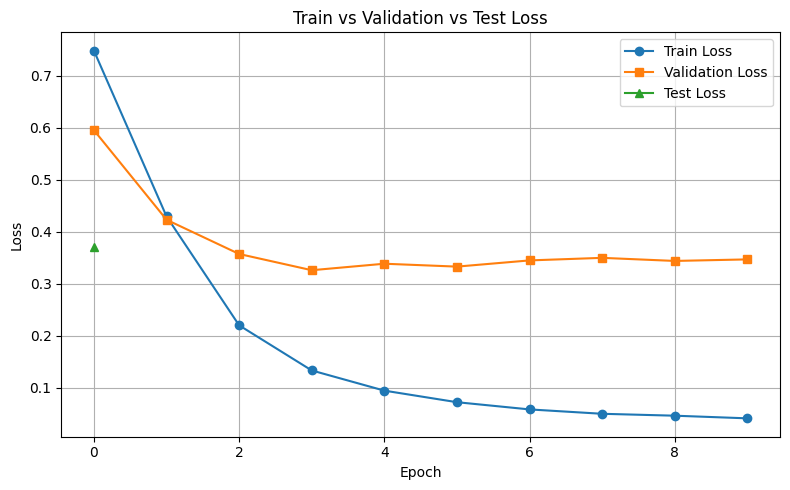

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.plot(test_losses, label='Test Loss', marker='^')
plt.title("Train vs Validation vs Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

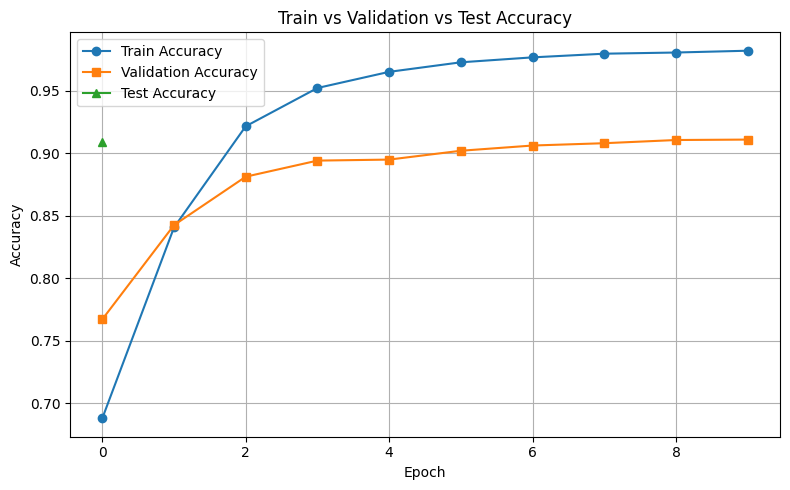

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='s')
plt.plot(test_accuracies, label='Test Accuracy', marker='^')
plt.title("Train vs Validation vs Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()